# **BANK MARKETING**

## **1- Prétraitements**

Ici , nous allons lancer la phase de Préprocessing et EDA 

In [2]:
#Import des bibliothèques 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#lecture du dataset 

df = pd.read_csv("data/bank-full.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# connaitre le type des colonnes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# connaitre les basiques stats 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# vérifier les valeurs manquantes

df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# vérification des doublons
print("Nombre de doublons :", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Nombre de doublons : 0


In [8]:
# Suppression des colonnes : 

df_clean = df.drop(columns = 'contact')
# Renomer les colonnes : 
df_clean = df_clean.rename(columns = {
    'job': 'metier',
    'marital': 'statut_matrimonial',
    'education': 'niveau_etudes',
    'default': 'defaut_credit',
    'housing': 'pret_immo',
    'loan': 'pret_conso',
    'balance': 'solde_bancaire',
    'poutcome': 'resultat_precedent',
    'month': 'mois',
    'y': 'souscription' })
# Remplacement des valeurs ('other', ' unknown') par la valeur ('no existant') :
df_clean['resultat_precedent']= df_clean['resultat_precedent'].replace (['other','unknown'], 'no existant')

df_clean.head()

,age,metier,statut_matrimonial,niveau_etudes,defaut_credit,solde_bancaire,pret_immo,pret_conso,day,mois,duration,campaign,pdays,previous,resultat_precedent,souscription
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no existant,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no existant,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no existant,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no existant,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no existant,no


In [9]:
def segmenter_pdays(jours):
    if jours == -1:
        return "Jamais contacte"
    elif jours <= 30:
        return "Recent (0-30j)"
    elif jours <= 90:
        return "Intermediaire (31-90j)"
    else:
        return "Ancien (>90j)"

df_clean['segment_contact'] = df_clean['pdays'].apply(segmenter_pdays)

df_clean.head()

,age,metier,statut_matrimonial,niveau_etudes,defaut_credit,solde_bancaire,pret_immo,pret_conso,day,mois,duration,campaign,pdays,previous,resultat_precedent,souscription,segment_contact
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no existant,no,Jamais contacte
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no existant,no,Jamais contacte
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no existant,no,Jamais contacte
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no existant,no,Jamais contacte
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no existant,no,Jamais contacte


In [10]:
# Exporter la data_clean :
#df_clean.to_csv ('data_clean.csv',index=False)

## **2- EDA**

Clients YES : 5289 (11.7%)
Clients NO  : 39922 (88.3%)


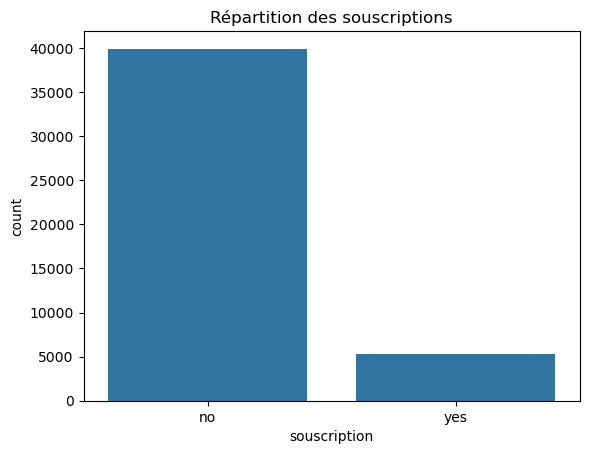

In [ ]:
# Nombre de personnes ayant souscrit ou non 
nb_yes = (df_clean['souscription'] == 'yes').sum()
nb_no = (df_clean['souscription'] == 'no').sum()
total = len(df_clean)
pct_yes = nb_yes / total * 100
pct_no = nb_no / total * 100
print(f"Clients YES : {nb_yes} ({pct_yes:.1f}%)")
print(f"Clients NO  : {nb_no} ({pct_no:.1f}%)")
sns.countplot(x='souscription', data=df_clean)
plt.title("Répartition des souscriptions")
plt.show()


**Analyse du graphe** : 

La variable cible présente un fort déséquilibre : seulement 11.7% des clients ont souscrit au dépôt à terme. C'est typique des campagnes de marketing réel.
L'EDA devra donc se concentrer sur l'identification des caractéristiques spécifiques aux souscripteurs, en utilisant des visualisations basées sur des proportions et des distributions comparées.

Peu de clients souscrivent donc il faut creuser le profil des 11.7% de souscripteurs : qui sont -ils ? (age , profession, situation familiale, niveau d'éducation)
Quelle est leur situation financière ? (Solde, crédits, prêts ?) 


<br>
___

<br>
<br>

**Suite à cette analyse globale du pourcentage de souscriptions, nous allons explorer comment les caractéristiques influencent cette variable.**

/var/folders/50/d_58kkn10194h88952mdx0jr0000gn/T/ipykernel_5420/645545666.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby('age_group')['souscription']


<Figure size 800x500 with 0 Axes>

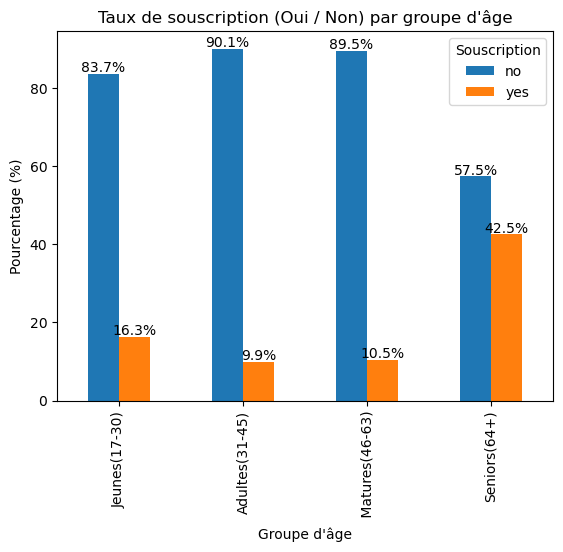

In [23]:
#Montrer si les souscripteurs sont plus jeunes ou plus âgés

df_clean['age_group'] = pd.cut(
    df_clean['age'],
    bins=[17, 30, 45, 63, 100],
    labels=['Jeunes(17-30)', 'Adultes(31-45)', ' Matures(46-63)', 'Seniors(64+)']
)
age_rate = (
    df_clean.groupby('age_group')['souscription']
    .value_counts(normalize=True)
    .unstack() * 100
)
plt.figure(figsize=(8,5))
age_rate.plot(kind='bar')
for container in plt.gca().containers:
    for bar in container:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                 f"{height:.1f}%", ha='center')

plt.title("Taux de souscription (Oui / Non) par groupe d'âge")
plt.xlabel("Groupe d'âge")
plt.ylabel("Pourcentage (%)")
plt.legend(title="Souscription")
plt.show()

<Figure size 1000x500 with 0 Axes>

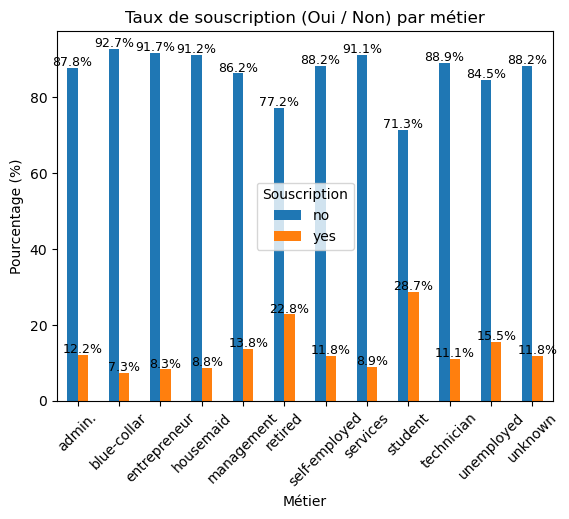

In [13]:
#montrer quels métiers sont les plus susceptibles de dire OUI au dépôt à terme.
job_rate = (
    df_clean.groupby('metier')['souscription']
    .value_counts(normalize=True)
    .unstack() * 100
)
plt.figure(figsize=(10,5))
job_rate.plot(kind='bar')
for container in plt.gca().containers:
    for bar in container:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                 f"{height:.1f}%", ha='center', fontsize=9)

plt.xticks(rotation=45)
plt.title("Taux de souscription (Oui / Non) par métier")
plt.xlabel("Métier")
plt.ylabel("Pourcentage (%)")
plt.legend(title="Souscription")
plt.show()

<Figure size 1000x500 with 0 Axes>

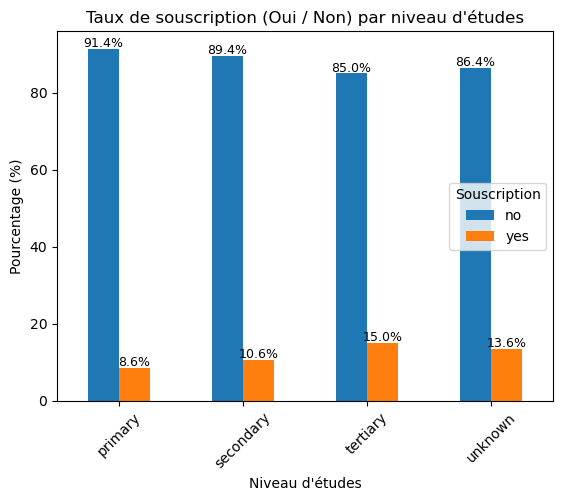

In [14]:
#montrer quels éductaions sont les plus susceptibles de dire OUI au dépôt à terme.
education_rate = (
    df_clean.groupby('niveau_etudes')['souscription']
    .value_counts(normalize=True)
    .unstack() * 100
)
plt.figure(figsize=(10,5))
education_rate.plot(kind='bar')
for container in plt.gca().containers:
    for bar in container:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                 f"{height:.1f}%", ha='center', fontsize=9)

plt.xticks(rotation=45)
plt.title("Taux de souscription (Oui / Non) par niveau d'études")
plt.xlabel("Niveau d'études")
plt.ylabel("Pourcentage (%)")
plt.legend(title="Souscription")
plt.show()

<Figure size 1000x500 with 0 Axes>

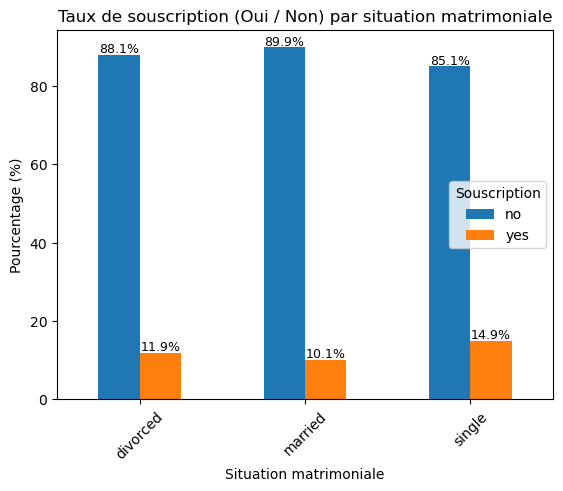

In [15]:
#montrer quels sont les situations matrimoniales les plus susceptibles de dire OUI au dépôt à terme.
marital_rate = (
    df_clean.groupby('statut_matrimonial')['souscription']
    .value_counts(normalize=True)
    .unstack() * 100
)
plt.figure(figsize=(10,5))
marital_rate.plot(kind='bar')
for container in plt.gca().containers:
    for bar in container:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                 f"{height:.1f}%", ha='center', fontsize=9)

plt.xticks(rotation=45)
plt.title("Taux de souscription (Oui / Non) par situation matrimoniale")
plt.xlabel("Situation matrimoniale")
plt.ylabel("Pourcentage (%)")
plt.legend(title="Souscription")
plt.show()

<Figure size 1000x500 with 0 Axes>

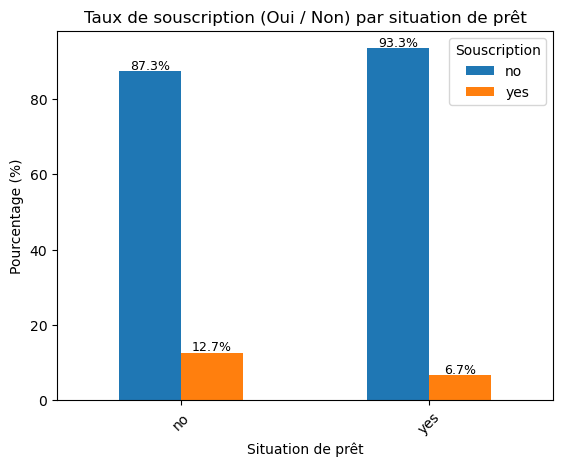

In [16]:
#montrer si les peronnes ayant un prêt sont les plus susceptibles de dire OUI au dépôt à terme.
loan_rate = (
    df_clean.groupby('pret_conso')['souscription']
    .value_counts(normalize=True)
    .unstack() * 100
)
plt.figure(figsize=(10,5))
loan_rate.plot(kind='bar')
for container in plt.gca().containers:
    for bar in container:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                 f"{height:.1f}%", ha='center', fontsize=9)

plt.xticks(rotation=45)
plt.title("Taux de souscription (Oui / Non) par situation de prêt")
plt.xlabel("Situation de prêt")
plt.ylabel("Pourcentage (%)")
plt.legend(title="Souscription")
plt.show()

<Figure size 1000x500 with 0 Axes>

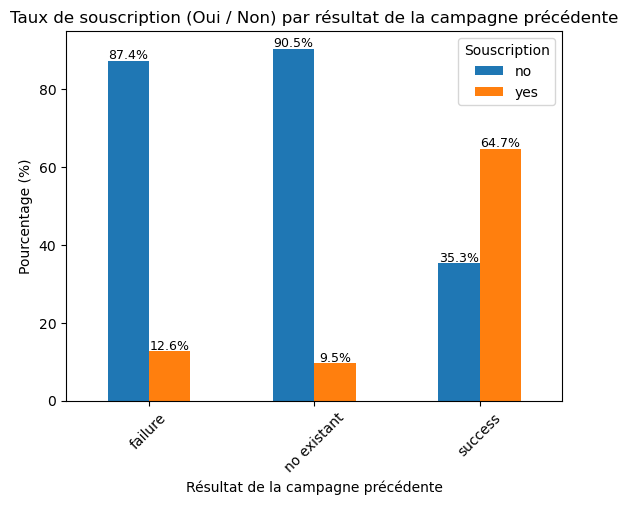

In [17]:
#montrer le taux de souscription par le résultat de la campagne pécédente

poutcome_rate = (
    df_clean.groupby('resultat_precedent')['souscription']
    .value_counts(normalize=True)
    .unstack() * 100
)
plt.figure(figsize=(10,5))
poutcome_rate.plot(kind='bar')
for container in plt.gca().containers:
    for bar in container:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                 f"{height:.1f}%", ha='center', fontsize=9)

plt.xticks(rotation=45)
plt.title("Taux de souscription (Oui / Non) par résultat de la campagne précédente")
plt.xlabel("Résultat de la campagne précédente")
plt.ylabel("Pourcentage (%)")
plt.legend(title="Souscription")
plt.show()

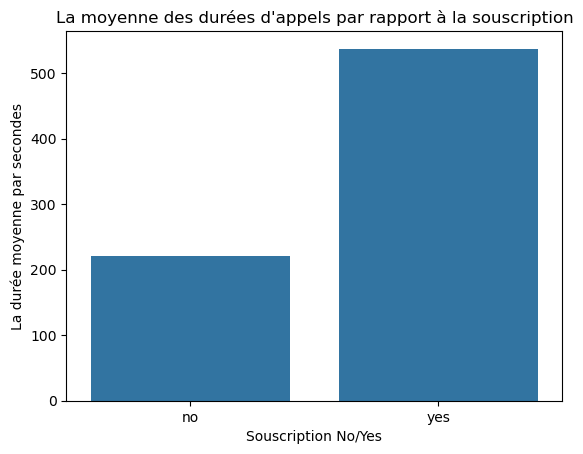

In [18]:
#montrer si la durée des appels impacte la souscription :

sns.barplot(x='souscription',y='duration',data=df_clean, estimator='mean', errorbar= None)

plt.title("La moyenne des durées d'appels par rapport à la souscription")
plt.ylabel("La durée moyenne par secondes")
plt.xlabel("Souscription No/Yes")
plt.show()

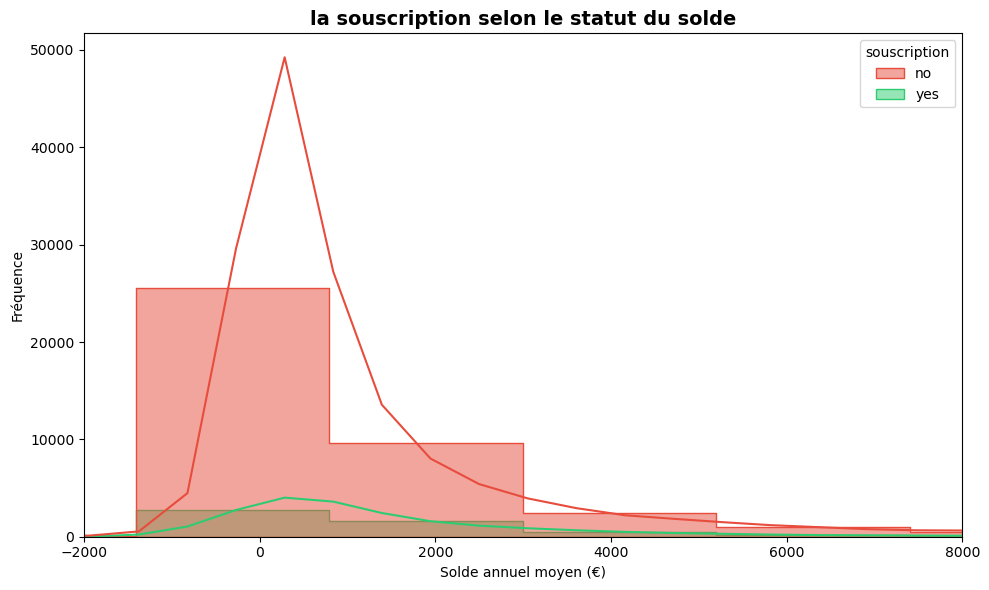

In [19]:
# la distribution de la balance (solde) selon souscription : 

plt.figure(figsize=(10, 6))

# Histogrammes superposés avec transparence et zoom
sns.histplot(
    data=df_clean,
    x='solde_bancaire',
    hue='souscription',
    kde=True,
    palette=['#e74c3c', '#2ecc71'],
    alpha=0.5,
    bins=50,
    element='step'  # Contour seulement pour meilleure lisibilité
)

plt.title("la souscription selon le statut du solde", fontsize=14, weight='bold')
plt.xlabel("Solde annuel moyen (€)")
plt.ylabel("Fréquence")
plt.xlim(-2000, 8000)  # ZOOM sur 98% des données

plt.tight_layout()
plt.show()


/var/folders/50/d_58kkn10194h88952mdx0jr0000gn/T/ipykernel_5420/2171487435.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mois_conv = df_clean.groupby('mois')['souscription'].apply(lambda x: (x == 'yes').mean() * 100)
/var/folders/50/d_58kkn10194h88952mdx0jr0000gn/T/ipykernel_5420/2171487435.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mois_conv.values, y=mois_conv.index, palette='coolwarm')


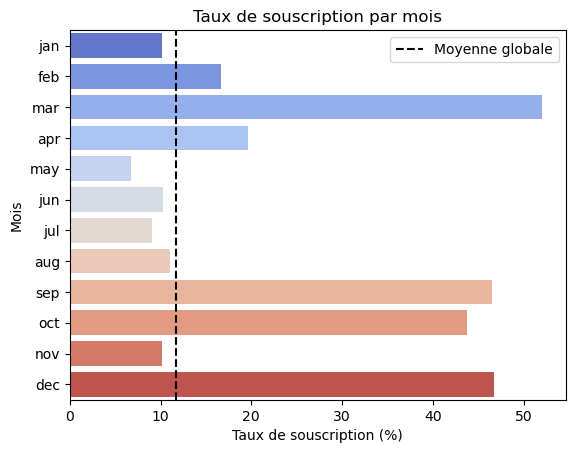

In [20]:

mois_ordre = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df_clean['mois'] = pd.Categorical(df_clean['mois'], categories=mois_ordre, ordered=True)

mois_conv = df_clean.groupby('mois')['souscription'].apply(lambda x: (x == 'yes').mean() * 100)

sns.barplot(x=mois_conv.values, y=mois_conv.index, palette='coolwarm')
plt.title("Taux de souscription par mois")
plt.xlabel("Taux de souscription (%)")
plt.ylabel("Mois")
plt.axvline(df_clean['souscription'].eq('yes').mean() * 100, color='black', linestyle='--', label='Moyenne globale')
plt.legend()
plt.show()

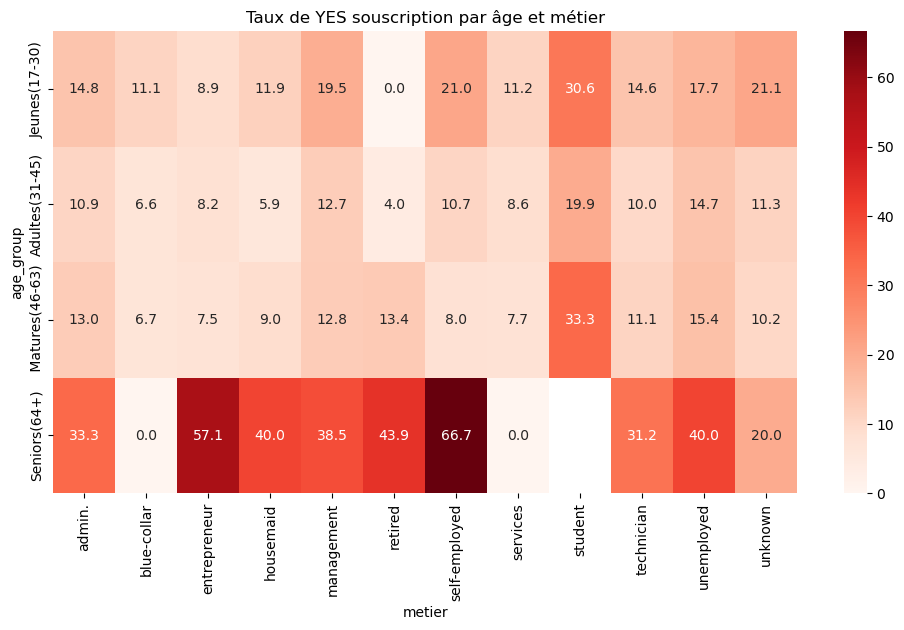

In [21]:
#corrélation entre âge et métier pour la souscrption 
cross = pd.crosstab(
    df_clean['age_group'],
    df_clean['metier'],
    values=(df_clean['souscription'] == 'yes'),
    aggfunc='mean'
) * 100

plt.figure(figsize=(12,6))
sns.heatmap(cross, annot=True, fmt=".1f", cmap="Reds")
plt.title("Taux de YES souscription par âge et métier")
plt.show()

In [22]:
import boto3
import os
from io import StringIO
from dotenv import load_dotenv

# Charger les variables du fichier .env
load_dotenv()

def sent_to_wh(df, file_name):
    # Transformation du DataFrame en texte (CSV)
    csv_buffer = StringIO()
    df.to_csv(csv_buffer, sep=';', index=False)
    
    # Connexion avec les id
    s3_client = boto3.client(
        's3',
        aws_access_key_id=os.getenv('ACCESS_KEY'),
        aws_secret_access_key=os.getenv('SECRET_KEY'),
        region_name="eu-west-3"
    
    )
    
    # envoie sur le cloud
    s3_client.put_object(
        Bucket=os.getenv('BUCKET_NAME'), 
        Key=file_name, 
        Body=csv_buffer.getvalue()
    )
    
    print(f"✅ Mission accomplie ! Le fichier '{file_name}' est stocké sur S3.")

# --- LANCEMENT ---
sent_to_wh(df_clean, "bank_marketing_cleaned_v1.csv")

✅ Mission accomplie ! Le fichier 'bank_marketing_cleaned_v1.csv' est stocké sur S3.
